# Лаботаторная №1. 

Проводиться эксперимент: монета бросается 100 раз.

Постройте модель этого эксперимента. Имея возможность воспроизводить эксперимент, ответьте на вопросы:
1. Какое число орлов выпадает в среднем
2. С какой вероятностью можно получить число орлов больше 60
3. Для интервалов $[0, 10), [10, 20), \dots, [80, 90), [90, 100]$ оцените вероятность выпадения числа орлов, принадлежащих соотвествующему интервалу
4. Внутри какого интервала с вероятность 0.95 стоит ожидать значение числа орлов
5. С какой вероятностью найдется хотябы одна серия из 5 орлов подряд
6. Пусть монета не симметрична. Вероятность выпадения орла равна $p$, соотвественно вероятность решки --- $1-p$. 
Постройте график зависимости от вероятноти $p$:
    1. ожидаемого числа орлов (пункт 1)
    2. ширины предсказательного интервала (пункт 4)
    3. вероятности наличия серии из 5 орлов (пункт 5)
    4. длинны максимальной серии


---
Оформим функцию модели

In [2]:
import random as rnd


def flipCoin(n, seed):
    arr = []
    rnd.seed(seed)
    for i in range(n):
        arr.append(rnd.randint(0,1))
        
    return arr
        

In [3]:
print(flipCoin(100, 0))

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]


# 1
Чтобы посчитать среднее число орлов проведем эксперимент 1000 раз

In [4]:
res = 0
n = 10000

for i in range(n):
    res += sum(flipCoin(100, i*2))
print("average amount of heads: ", res/n)
    

average amount of heads:  49.9303


Получили число очень близкое к 50

# 2

Теперь оценим вероятность числа орлов более 60

In [5]:
n_60 = 0 # число


for i in range(n):
    n_60 += 1 if  sum(flipCoin(100, i*5))>=60 else 0
print("Probabilty of 60 or more heads: ", n_60/n)

Probabilty of 60 or more heads:  0.0263


# 3

0 : 10  =  0.8
10 : 20  =  0.4
20 : 30  =  0.7
30 : 40  =  0.4
40 : 50  =  0.4
50 : 60  =  0.6
60 : 70  =  0.3
70 : 80  =  0.5
80 : 90  =  0.5
90 : 100  =  0.4


(array([1., 0., 4., 0., 2., 0., 1., 0., 1., 1.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

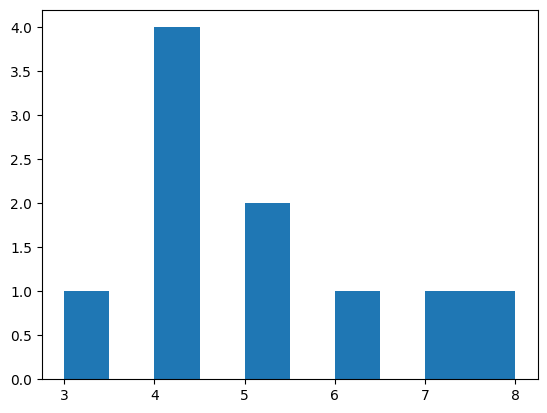

In [6]:
import matplotlib.pyplot as plt
arr = flipCoin(100, 0)
intervals = []
for i in range(10):
    intervals.append(sum(arr[i*10: (i+1)*10]))
    print(i*10, ":", (i+1)*10,  " = ", intervals[i]/10)
    
plt.hist(intervals)
    

# 4

Interval of 95%: [ 40 , 60 ]


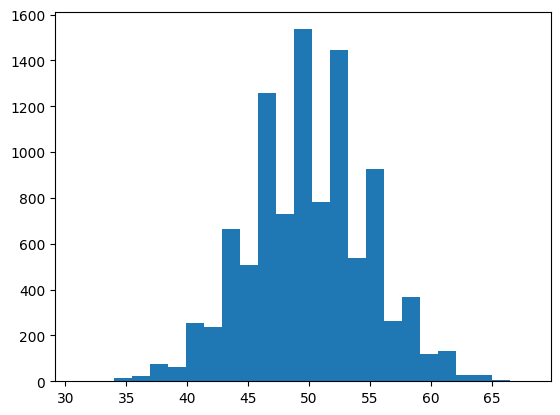

In [16]:
SumDistr = []

for i in range(10000):
    SumDistr.append(sum(flipCoin(100, i+81)))
plt.hist(SumDistr,bins =25)
SumDist = sorted(SumDistr)
print("Interval of 95%: [", SumDist[int(0.025*10000)], ",",SumDist[int(0.975*10000)], "]")

# 5

5 орлов подряд в выборке при 100 бросках


In [8]:

headsInRow = 0
for i in range(10000):
    counter = 0
    for x in flipCoin(100, i*7+27):
        if x == 1:
            counter+=1
            if counter == 5:
                headsInRow+=1
                break
        if x == 0:
            counter = 0
print (headsInRow/100, "%")        
        

80.61 %


# 6
Для несимметричной монеты данная функция уже не подойдет. Так будет выглядеть модель несимметричной монеты

In [9]:
def flipAsymCoin(amount, p, Seed):
    arr = []
    rnd.seed(Seed)
    for i in range(amount):
        arr.append(int(rnd.random() < p))
    return arr

print(sum(flipAsymCoin(50,0.95, 12)))

47


# 6.a

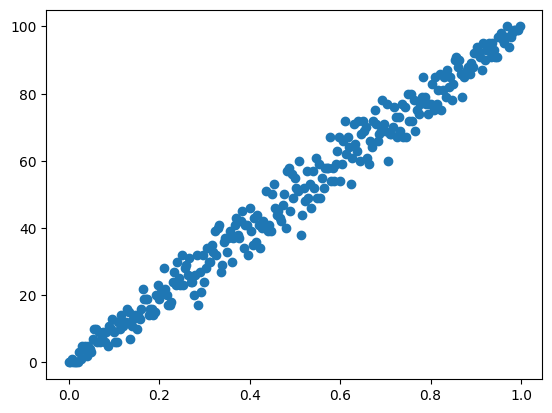

In [10]:
sumRes = []
pRes = []
resolution = 300
for i in range(resolution):
    p = i/resolution
    pRes.append(p)
    sumRes.append(sum(flipAsymCoin(100, p, i*4-73)))
plt.scatter(pRes, sumRes)

# 6.b

Построим график ширины предсказательного интервала от параметра p

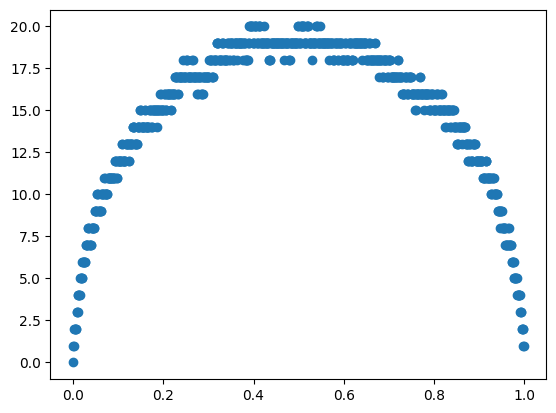

In [11]:
WideLength = []
pRes = []
for x in range(1000):        
    SumDistr = []
    p = x/1000
    pRes.append(p)
    for i in range(1000):
        
        SumDistr.append(sum(flipAsymCoin(100, p, i+81+x*2)))
    SumDist = sorted(SumDistr)
    WideLength.append(SumDist[int(0.975*1000)]- SumDist[int(0.025*1000)] )
#plt.hist(WideLength)
plt.scatter(pRes, WideLength)
#print(WideLength)

# 6.c

Посчитаем зависимость вероятности ряда из 5 орлов.

[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]


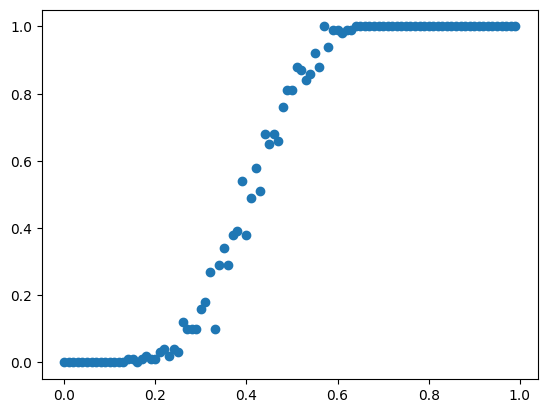

In [12]:
pRes = []
headsInRowAmount = []
expAmount = 100
for t in range(100):
    
    headsInRow = 0
    p = t/100
    pRes.append(p)
    for i in range(expAmount):
        counter = 0
        for x in flipAsymCoin(100, p,t*i*6+27):
            if x == 1:
                counter+=1
                if counter == 5:
                    headsInRow+=1
                    break
            if x == 0:
                counter = 0
    headsInRowAmount.append(headsInRow/expAmount)      
#print(headsInRowAmount)
plt.scatter(pRes, headsInRowAmount)
print(flipAsymCoin(100, 0.3,3*6+21))

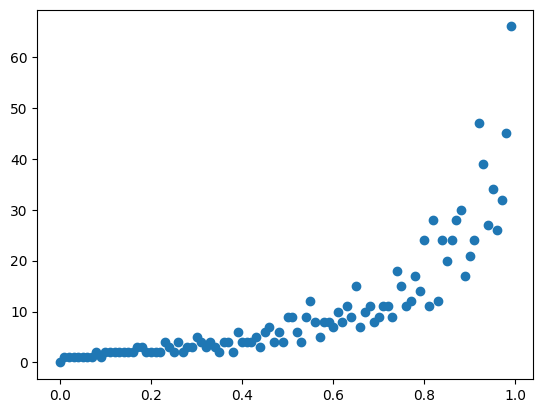

In [13]:
pRes = []
headsInRowMax = []
expAmount = 1
for t in range(100):
    
    headsInRow = 0
    p = t/100
    pRes.append(p)
    for i in range(expAmount):
        counter = 0
        maxCounter = 0
        for x in flipAsymCoin(100, p,t*6+27):
            if x == 1:
                counter+=1
                if counter > maxCounter:
                    maxCounter = counter                    
            else:
                counter = 0
    headsInRowMax.append(maxCounter)      
plt.scatter(pRes, headsInRowMax)
